In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sparse-V Output Comparison

#### (**Old sparse attention**) Comparison with base model

Experiments using the initial implementation of sparse attention where the number of values selected (k) is taken as the percentage of the context length. Issues:
* When sequences are batched, each sequence is padded to the length of the longest sequence in the batch. This probably does not change the result too much, as the sequences are ordered by length before batching, which leads to similarly sized sequences in the batch.
* Each query attends to the same (k) number of tokens in the sequence. This means that tokens earlier in the sequence attend to a larger percentage of its context. Since we want to simulate the access to a potentially large KV cache, we would want these tokens to also be generated using the sparse attention.

In [4]:
df = pd.read_json("../out/sparse_attention_original.jsonl", lines=True)

In [5]:
df

,model,proportion,entropy_rmse,entropy_rmse_stderr,exact_match_length,exact_match_length_stderr,edit_distance_L16,edit_distance_L16_stderr,_duration
0,pythia-70m,0.05,0.350654,0.005192,4.146697,0.315334,11.305711,0.143442,238.178338
1,pythia-70m,0.10,0.225118,0.004419,7.492721,0.497430,9.837626,0.166391,248.012386
2,pythia-70m,0.20,0.122600,0.002238,13.916014,0.682491,7.410974,0.183124,246.685852
3,pythia-70m,0.50,0.026301,0.000583,33.964165,0.908129,3.357223,0.164248,263.047797
4,pythia-70m,0.75,0.003111,0.000088,51.506161,0.757852,1.236282,0.110755,236.799958
5,pythia-70m,1.00,0.000000,0.000000,64.000000,0.000000,0.000000,0.000000,246.725126
6,pythia-160m,0.05,0.339271,0.003663,4.388578,0.290034,10.503920,0.142157,615.836033
7,pythia-160m,0.10,0.205058,0.002149,6.589026,0.372340,8.893617,0.161091,643.445735
8,pythia-160m,0.20,0.116383,0.001389,11.891377,0.571014,6.891377,0.173385,593.476101
9,pythia-160m,0.50,0.028476,0.000899,31.470325,0.861132,2.928331,0.150813,587.186891


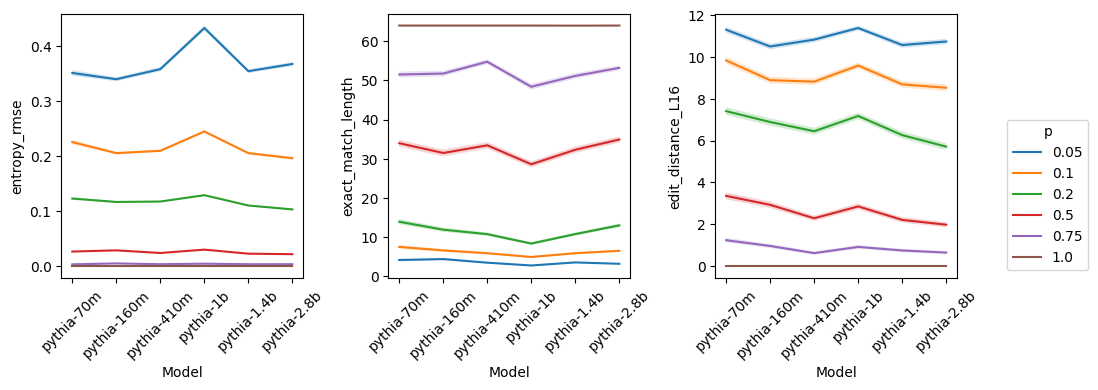

In [6]:
grouped = df.groupby('proportion')

metrics = ["entropy_rmse", "exact_match_length", "edit_distance_L16"]

fig, ax = plt.subplots(nrows=1, ncols=len(metrics), figsize=(10, 4))

alpha = 0.2
for i, metric in enumerate(metrics):
    for proportion, group in grouped:
        ax[i].plot(group['model'], group[metric], label=proportion)
        ax[i].fill_between(group['model'], group[metric] - group[metric + "_stderr"], group[metric] + group[metric + '_stderr'], alpha=alpha)
        handles, labels = ax[i].get_legend_handles_labels()

    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set_xlabel('Model')
    ax[i].set_ylabel(metric)
    
plt.tight_layout()
legend = fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.1, 0.5), title="p")

plt.show()

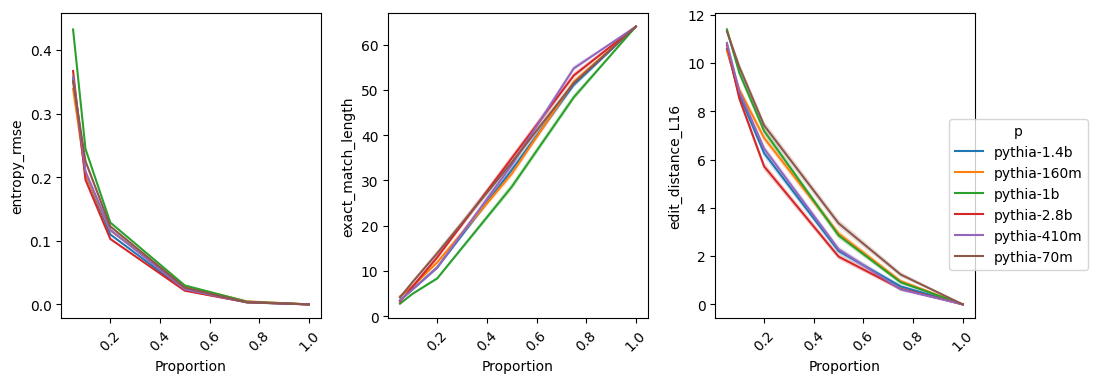

In [7]:
grouped = df.groupby('model')

metrics = ["entropy_rmse", "exact_match_length", "edit_distance_L16"]

fig, ax = plt.subplots(nrows=1, ncols=len(metrics), figsize=(10, 4))

alpha = 0.2
for i, metric in enumerate(metrics):
    for model, group in grouped:
        ax[i].plot(group['proportion'], group[metric], label=model)
        ax[i].fill_between(group['proportion'], group[metric] - group[metric + "_stderr"], group[metric] + group[metric + '_stderr'], alpha=alpha)
        handles, labels = ax[i].get_legend_handles_labels()

    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set_xlabel('Proportion')
    ax[i].set_ylabel(metric)
    
plt.tight_layout()
legend = fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.1, 0.5), title="p")

plt.show()

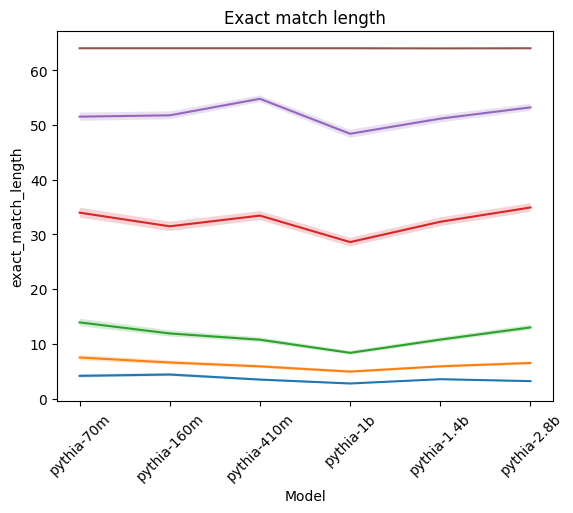

In [8]:
grouped = df.groupby('proportion')

metric = "exact_match_length"

fig, ax = plt.subplots()

alpha = 0.2
for proportion, group in grouped:
    ax.plot(group['model'], group[metric], label=proportion)
    ax.fill_between(group['model'], group[metric] - group[metric + "_stderr"], group[metric] + group[metric + '_stderr'], alpha=alpha)
    handles, labels = ax.get_legend_handles_labels()

ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel('Model')
ax.set_ylabel(metric)
    
plt.title("Exact match length")
plt.show()